In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy import integrate as integrate
import pandas as pd
from scipy.optimize import minimize
from scipy.special import erf
from matplotlib import cm

In [36]:
plt.style.use('default')
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import time

In [37]:
def E( parameters,z):   #Flat XCDM universe
    omega=parameters[0]
    omega_x=parameters[1]
    return ((omega*((1+z)**3)) + ((1-omega)*((1+z)**(3*(1+omega_x)))))**(1/2)

In [38]:
def erf_new(x):
    return ((4/np.pi)**(1/2))*(erf(x)-erf(0))

In [39]:
def alpha(parameters,sigma_Ho,sigma,z):

    n = len(sigma)
    alpha0=1/(sigma_Ho)**2
    for i in range(n):
        alpha0 = alpha0 + (E(parameters,z[i])/sigma[i])**2
        
    return alpha0
        

In [40]:
def beta(parameters,Ho,sigma_Ho,H_obs,sigma,z):
    n = len(sigma)
    beta0=Ho/((sigma_Ho)**2)
    for i in range(n):
        beta0 = beta0 + (E(parameters,z[i])*H_obs[i]/((sigma[i])**2))
        
    return beta0
    

In [41]:
def gamma(Ho,sigma_Ho,H_obs,sigma):
    n = len(sigma)
    gamma0=(Ho/(sigma_Ho))**2
    for i in range(n):
        gamma0 = gamma0 + (H_obs[i]/sigma[i])**2
        
    return gamma0 

In [42]:
def Likelihood(parameters,Ho,sigma_Ho,H_obs,sigma,z):
    alpha0= alpha(parameters,sigma_Ho,sigma,z)
    beta0= beta(parameters,Ho,sigma_Ho,H_obs,sigma,z)
    gamma0= gamma(Ho,sigma_Ho,H_obs,sigma)
    LH1= (1/(4*alpha0*((sigma_Ho)**2)))**(1/2)
    LH2= np.exp(-gamma0/2+(((beta0)**2)/(2*alpha0)))
    LH3 = 1+ erf_new(beta0/((2*alpha0)**(1/2)))
    return (LH1*LH2*LH3)


In [43]:
def Chi_sq(parameters,Ho,sigma_Ho,H_obs,sigma,z):
    return (-2*np.log(Likelihood(parameters,Ho,sigma_Ho,H_obs,sigma,z)))

In [44]:
Data = pd.read_csv("Data.csv")
print(Data)

        z  H(z)(kms−1Mpc−1)  std_deviation(kms−1Mpc−1)
0   0.070              69.0                       19.6
1   0.100              69.0                       12.0
2   0.120              68.6                       26.2
3   0.170              83.0                        8.0
4   0.179              75.0                        4.0
5   0.199              75.0                        5.0
6   0.200              72.9                       29.6
7   0.270              77.0                       14.0
8   0.280              88.8                       36.6
9   0.350              76.3                        5.6
10  0.352              83.0                       14.0
11  0.400              95.0                       17.0
12  0.440              82.6                        7.8
13  0.480              97.0                       62.0
14  0.593             104.0                       13.0
15  0.600              87.9                        6.1
16  0.680              92.0                        8.0
17  0.730 

In [45]:
Data = Data.to_numpy()

In [46]:
z = Data[:,0]
H_obs = Data[:,1]
sigma = Data[:,2]
print(z)

[0.07  0.1   0.12  0.17  0.179 0.199 0.2   0.27  0.28  0.35  0.352 0.4
 0.44  0.48  0.593 0.6   0.68  0.73  0.781 0.875 0.88  0.9   1.037 1.3
 1.43  1.53  1.75  2.3  ]


In [47]:
Ho= 68
sigma_Ho=2.8

In [48]:
best_fit_params2 = minimize (Chi_sq,x0=[0,0],args=(73.8,2.4,H_obs,sigma,z),bounds=[(0,2),(-2,2)])
print(best_fit_params2)
print(np.round((best_fit_params2.x),2))
print(np.round((best_fit_params2.fun),2))

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 17.923942935651308
        x: [ 2.646e-01 -1.310e+00]
      nit: 14
      jac: [-2.913e-05 -4.761e-05]
     nfev: 57
     njev: 19
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
[ 0.26 -1.31]
17.92


In [49]:
best_fit_params1 = minimize (Chi_sq,x0=[0,0],args=(68,2.8,H_obs,sigma,z),bounds=[(0,2),(-2,2)])
print(best_fit_params1)
print(np.round((best_fit_params1.x),2))
print(np.round((best_fit_params1.fun),2))

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 18.023460401669155
        x: [ 2.899e-01 -1.047e+00]
      nit: 14
      jac: [-2.274e-05 -2.892e-04]
     nfev: 63
     njev: 21
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
[ 0.29 -1.05]
18.02


In [50]:
xlist = np.linspace(0, 0.60, 1000)
ylist = np.linspace(-2,-0.3, 1000)
parameters = np.meshgrid(xlist, ylist)
X=parameters[0]
Y=parameters[1]

In [51]:
Z = Chi_sq(parameters,68,2.8,H_obs,sigma,z)
Z2 =  Chi_sq(parameters,73.8,2.4,H_obs,sigma,z)

In [52]:
print(Z)

[[1302.78438195 1259.68280513 1224.51713643 ...   79.96282755
    80.09789173   80.23296121]
 [1301.6230465  1258.63334602 1223.53410668 ...   79.94444646
    80.07954031   80.21463946]
 [1300.46073457 1257.58278039 1222.5500148  ...   79.92606283
    80.06118634   80.19631516]
 ...
 [  32.58774913   32.57899308   32.5705755  ...   99.74425693
    99.83979619   99.93534393]
 [  32.61306327   32.60594301   32.59915384 ...   99.94258634
   100.03782765  100.13307733]
 [  32.64599333   32.64048259   32.63529568 ...  100.14212792
   100.23706951  100.33201934]]


<>:32: SyntaxWarning: invalid escape sequence '\O'
<>:33: SyntaxWarning: invalid escape sequence '\o'
<>:42: SyntaxWarning: invalid escape sequence '\L'
<>:49: SyntaxWarning: invalid escape sequence '\p'
<>:49: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\O'
<>:33: SyntaxWarning: invalid escape sequence '\o'
<>:42: SyntaxWarning: invalid escape sequence '\L'
<>:49: SyntaxWarning: invalid escape sequence '\p'
<>:49: SyntaxWarning: invalid escape sequence '\p'
C:\Users\sriva\AppData\Local\Temp\ipykernel_20740\2941000195.py:32: SyntaxWarning: invalid escape sequence '\O'
  ax1.set_xlabel('$\Omega_{mo}$')
C:\Users\sriva\AppData\Local\Temp\ipykernel_20740\2941000195.py:33: SyntaxWarning: invalid escape sequence '\o'
  ax1.set_ylabel('$\omega_{x}$')
C:\Users\sriva\AppData\Local\Temp\ipykernel_20740\2941000195.py:42: SyntaxWarning: invalid escape sequence '\L'
  ax1.text(0.01,-1.0,"Flat ${\Lambda}$CDM Line",weight="bold")
C:\Users\sriva\AppData\L

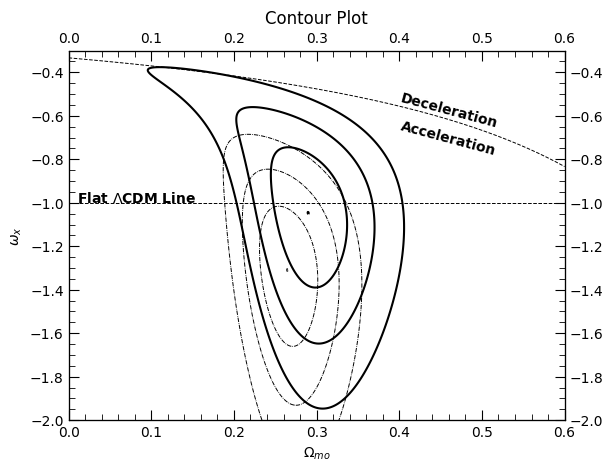

In [53]:
fig, ax1 = plt.subplots()

#drawing contour plot

cb = ax1.contour(X, Y, Z2,levels=[17.925,20.22,24.09,29.72],colors="black",linewidths=0.7,linestyles="dashdot")
cb2 = ax1.contour(X, Y, Z,levels=[18.024,20.323,24.193,29.823],colors="black")
flat_lambda_CDM = ax1.plot(xlist,(xlist*0-1),c="black",ls="--",lw=0.7)
acceleration_line=ax1.plot(xlist,(1/(3*xlist-3)),c="black",ls="--",lw=0.7)
#omega_lambda_nobigbang= 4*xlist*((np.cosh(np.arccosh((1-xlist)/(xlist))/3))**3)
#nobigbang= ax1.plot(xlist,omega_lambda_nobigbang,c="black",lw=0.5)
#Adding a colorbar to the plot
#fig.colorbar(cb) 

ax2 = ax1.twinx()
ax2.tick_params(direction='in')
ax2.set_ylim(-2,-0.3)
ax3= ax1.twiny()
ax3.tick_params(direction='in')
ax3.set_xlim(0,0.6)
ax3.xaxis.set_major_locator(MultipleLocator(0.1))
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_major_locator(MultipleLocator(0.2))
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which ='both',direction='in')
ax2.tick_params(which='major', length=7)
ax2.tick_params(which='minor', length=4)
ax3.tick_params(which ='both',direction='in')
ax3.tick_params(which='major', length=7)
ax3.tick_params(which='minor', length=4)
        
ax1.set_title('Contour Plot')
ax1.set_xlabel('$\Omega_{mo}$')
ax1.set_ylabel('$\omega_{x}$')
ax1.set_ylim(-2,-0.3)
ax1.xaxis.set_major_locator(MultipleLocator(0.1))
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_major_locator(MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which ='both',direction='in')
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.text(0.01,-1.0,"Flat ${\Lambda}$CDM Line",weight="bold")
ax1.text(0.4,-0.65,"Deceleration",rotation=-15,weight="bold")
ax1.text(0.4,-0.78,"Acceleration",rotation=-15,weight="bold")

#ax2.plot("--")

lines = [ cb2.collections[0],cb.collections[0]]
labels = ['Ho=68 $\pm$ 2.8','Ho=73.8 $\pm$ 2.4']
#ax.legend(["1","2"],loc=4,bbox_to_anchor=(1.1, 0.0))
#Ho=68 $\pm$ 2.8
#Ho=73.8 $\pm$ 2.4
plt.show()